#### Import packages

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'

from math import comb

import tqdm

import os

#### Import data

In [12]:
path = '../data/'

fname_1 = os.path.join(path, '20211202_A673-U2#83_PA-JF646_STORM_cell-1.xlsx')
fname_21 = os.path.join(path, '20211202_A673-U2#83_PA-JF646_STORM_cell-2-1.xlsx')
fname_22 = os.path.join(path, '20211202_A673-U2#83_PA-JF646_STORM_cell-2-2.xlsx')
fname_3 = os.path.join(path, '20211202_A673-U2#83_PA-JF646_STORM_cell-3.xlsx')
df_1 = pd.read_excel(fname_1, header = 1, index_col = 'ID')
df_21 = pd.read_excel(fname_21, header = 1, index_col = 'ID')
df_22 = pd.read_excel(fname_22, header = 1, index_col = 'ID')
df_3 = pd.read_excel(fname_3, header = 1, index_col = 'ID')

x_arr_nm_1 = 1000 * np.array(df_1['X Position [µm]'])
y_arr_nm_1 = 1000 * np.array(df_1['Y Position [µm]'])
x_arr_nm_21 = 1000 * np.array(df_21['X Position [µm]'])
y_arr_nm_21 = 1000 * np.array(df_21['Y Position [µm]'])
x_arr_nm_22 = 1000 * np.array(df_22['X Position [µm]'])
y_arr_nm_22 = 1000 * np.array(df_22['Y Position [µm]'])
x_arr_nm_3 = 1000 * np.array(df_3['X Position [µm]'])
y_arr_nm_3 = 1000 * np.array(df_3['Y Position [µm]'])

#### EWS-FLI1 hub parameters
The interaction radius, which can be found via linearized Ripley's K. Not yet implimented, so currently using 120 nm as from [this paper](https://www.nature.com/articles/s41594-018-0112-y).

In [13]:
# Interaction radius of EWS-FLI1
r_i = 120 #nm

#### Hub clustering

In [7]:
def cluster(x_arr_nm, y_arr_nm, r_i):
    '''
    Takes arrays containing x and y coords of 
    localizations in nm along with interaction radius and
    returns list of number of proteins in each detected hub/cluster
    
    Not that the number of iterations is not set, so 
    progress bar will not advance to 100%
    This is just a guide to ensure that the code hasn't frozen up
    '''
    x_list = x_arr_nm.tolist()
    y_list = y_arr_nm.tolist()

    cluster = []
    no_cluster = []

    for i, j in tqdm.tqdm(zip(x_list, y_list), total=len(x_list), leave = False):
        new_cluster = []
        is_cluster = False
        x_list.remove(i)
        y_list.remove(j)
        cluster_centers_x = [i]
        cluster_centers_y = [j]
        for k, l in zip(x_list, y_list):
            in_cluster = False
            for m, n in zip(cluster_centers_x, cluster_centers_y):
                if ((m - k)**2 + (n - l)**2) < 2 * r_i:
                    in_cluster = True
            if in_cluster == True:
                if is_cluster == False:
                    is_cluster = True
                    new_cluster.append([i, j])
                    new_cluster.append([k, l])
                    cluster_centers_x.append(k)
                    cluster_centers_y.append(l)
                else:
                    new_cluster.append([k, l])
                    cluster_centers_x.append(k)
                    cluster_centers_y.append(l)
                    x_list.remove(k)
                    y_list.remove(l)

        if is_cluster == False:
            no_cluster.append([i, j])
        else:
            cluster.append(new_cluster)
            new_cluster = []

    proteins_per_hub = []
    for i in cluster:
        proteins_per_hub.append(len(i))

    return proteins_per_hub

#### Perform clustering

In [14]:
proteins_per_hub_1 = cluster(x_arr_nm_1, y_arr_nm_1, r_i)
proteins_per_hub_21 = cluster(x_arr_nm_21, y_arr_nm_21, r_i)
proteins_per_hub_22 = cluster(x_arr_nm_22, y_arr_nm_22, r_i)
proteins_per_hub_3 = cluster(x_arr_nm_3, y_arr_nm_3, r_i)
proteins_per_hub = proteins_per_hub_1 + proteins_per_hub_21 + \
                    proteins_per_hub_22 + proteins_per_hub_3

#### Plot histogram

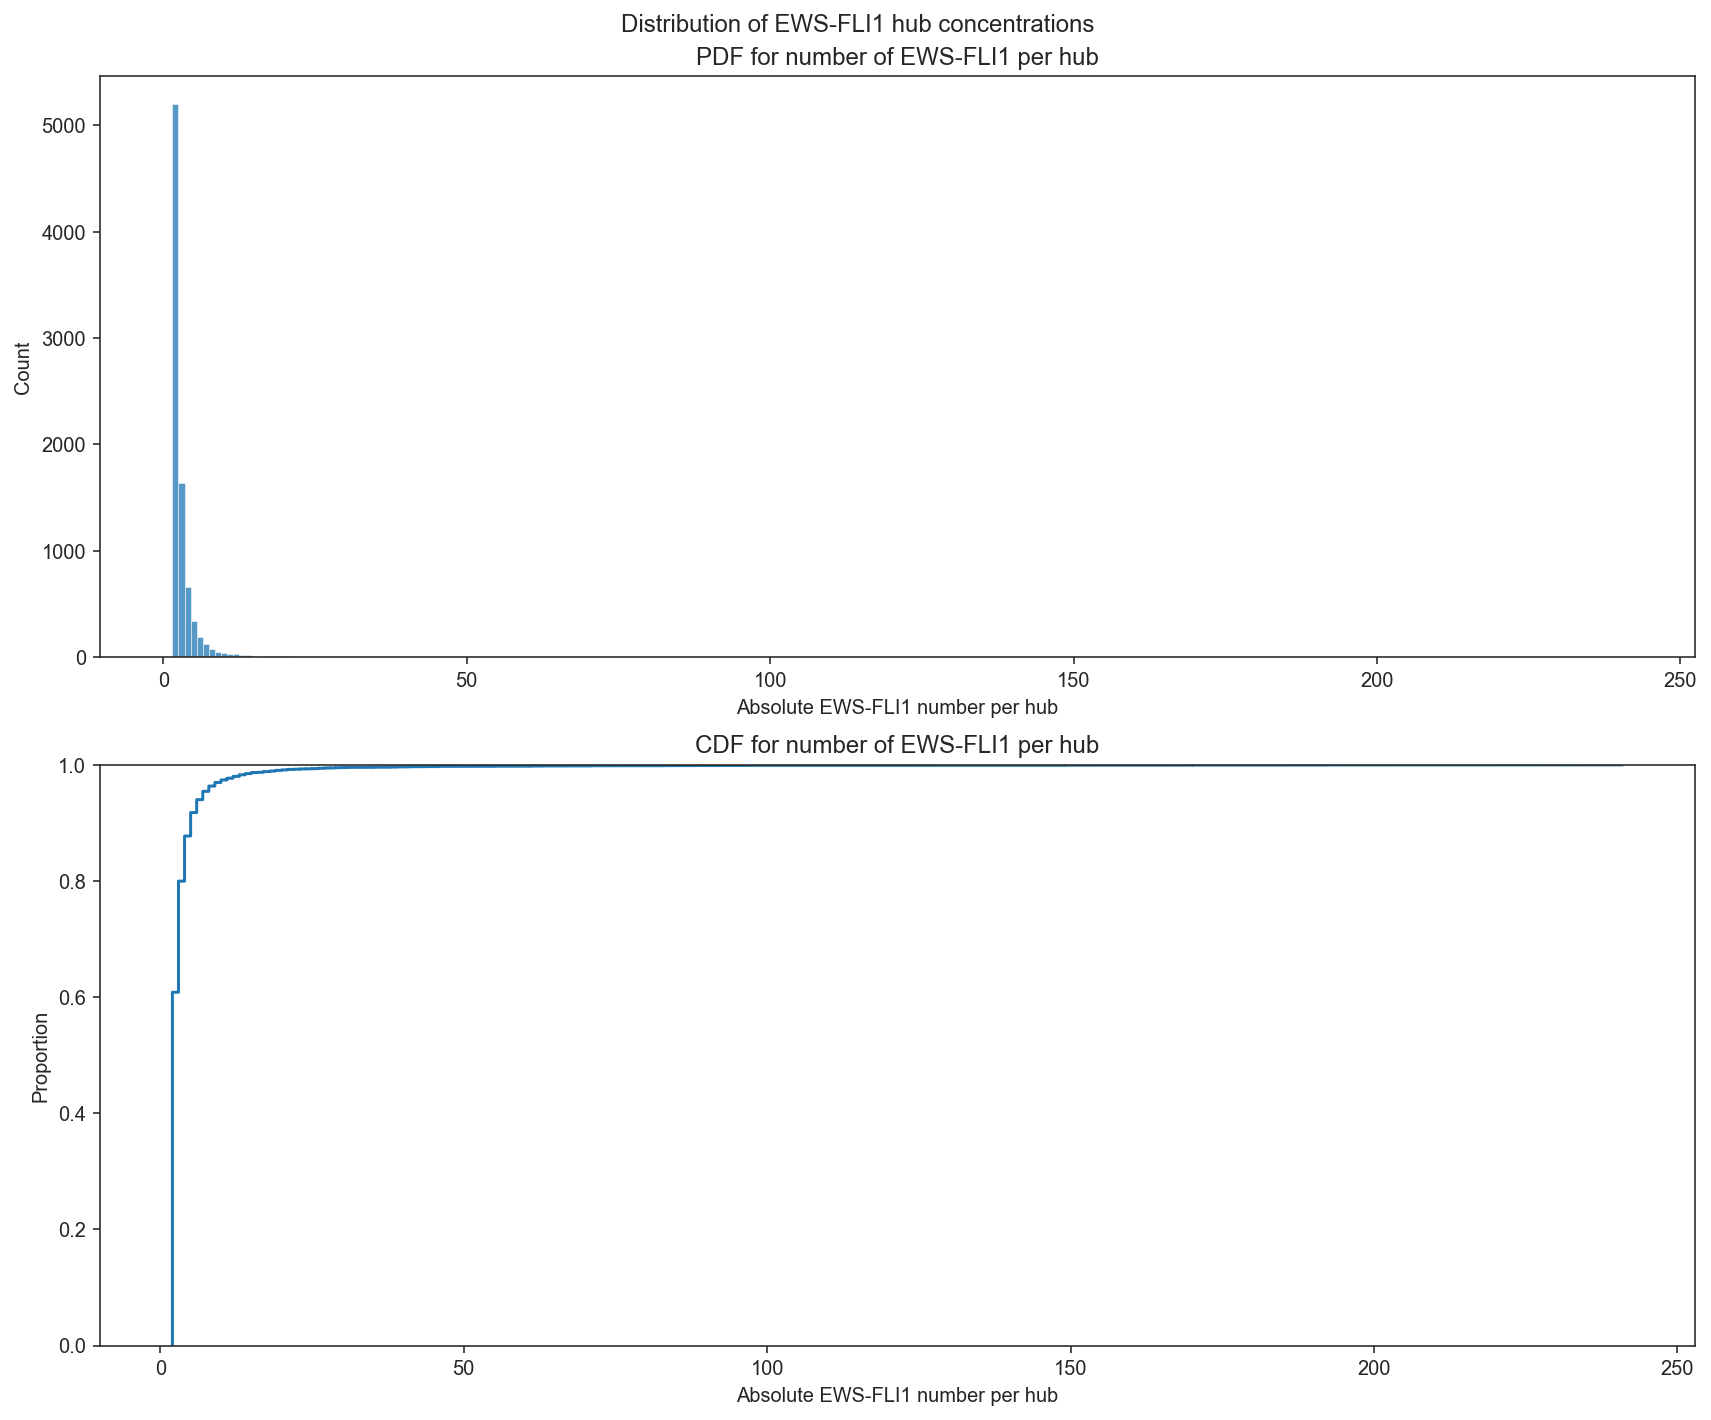

In [15]:
bins_list = np.arange(np.min(proteins_per_hub) - .5, np.max(proteins_per_hub) + .5, 1)

# Generate figure and title
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Distribution of EWS-FLI1 hub concentrations')

# Plot data from each channel on it's respective axis
sns.histplot(ax = axes[0], data = proteins_per_hub, bins = bins_list)
sns.ecdfplot(ax = axes[1], data = proteins_per_hub)

# Labeling subplots
axes[0].set_title('PDF for number of EWS-FLI1 per hub')
axes[1].set_title('CDF for number of EWS-FLI1 per hub')
axes[0].set_xlabel('Absolute EWS-FLI1 number per hub')
axes[1].set_xlabel('Absolute EWS-FLI1 number per hub');

plt.tight_layout()

In [12]:
%load_ext watermark
%watermark -a "Shawn Yoshida" -d -v -p jupyterlab --iversions

Author: Shawn Yoshida

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.27.0

jupyterlab: 3.1.7

matplotlib: 3.4.2
pandas    : 1.3.2
numpy     : 1.20.3
seaborn   : 0.11.2



#### Plot histogram of only hubs with more than eight localization events

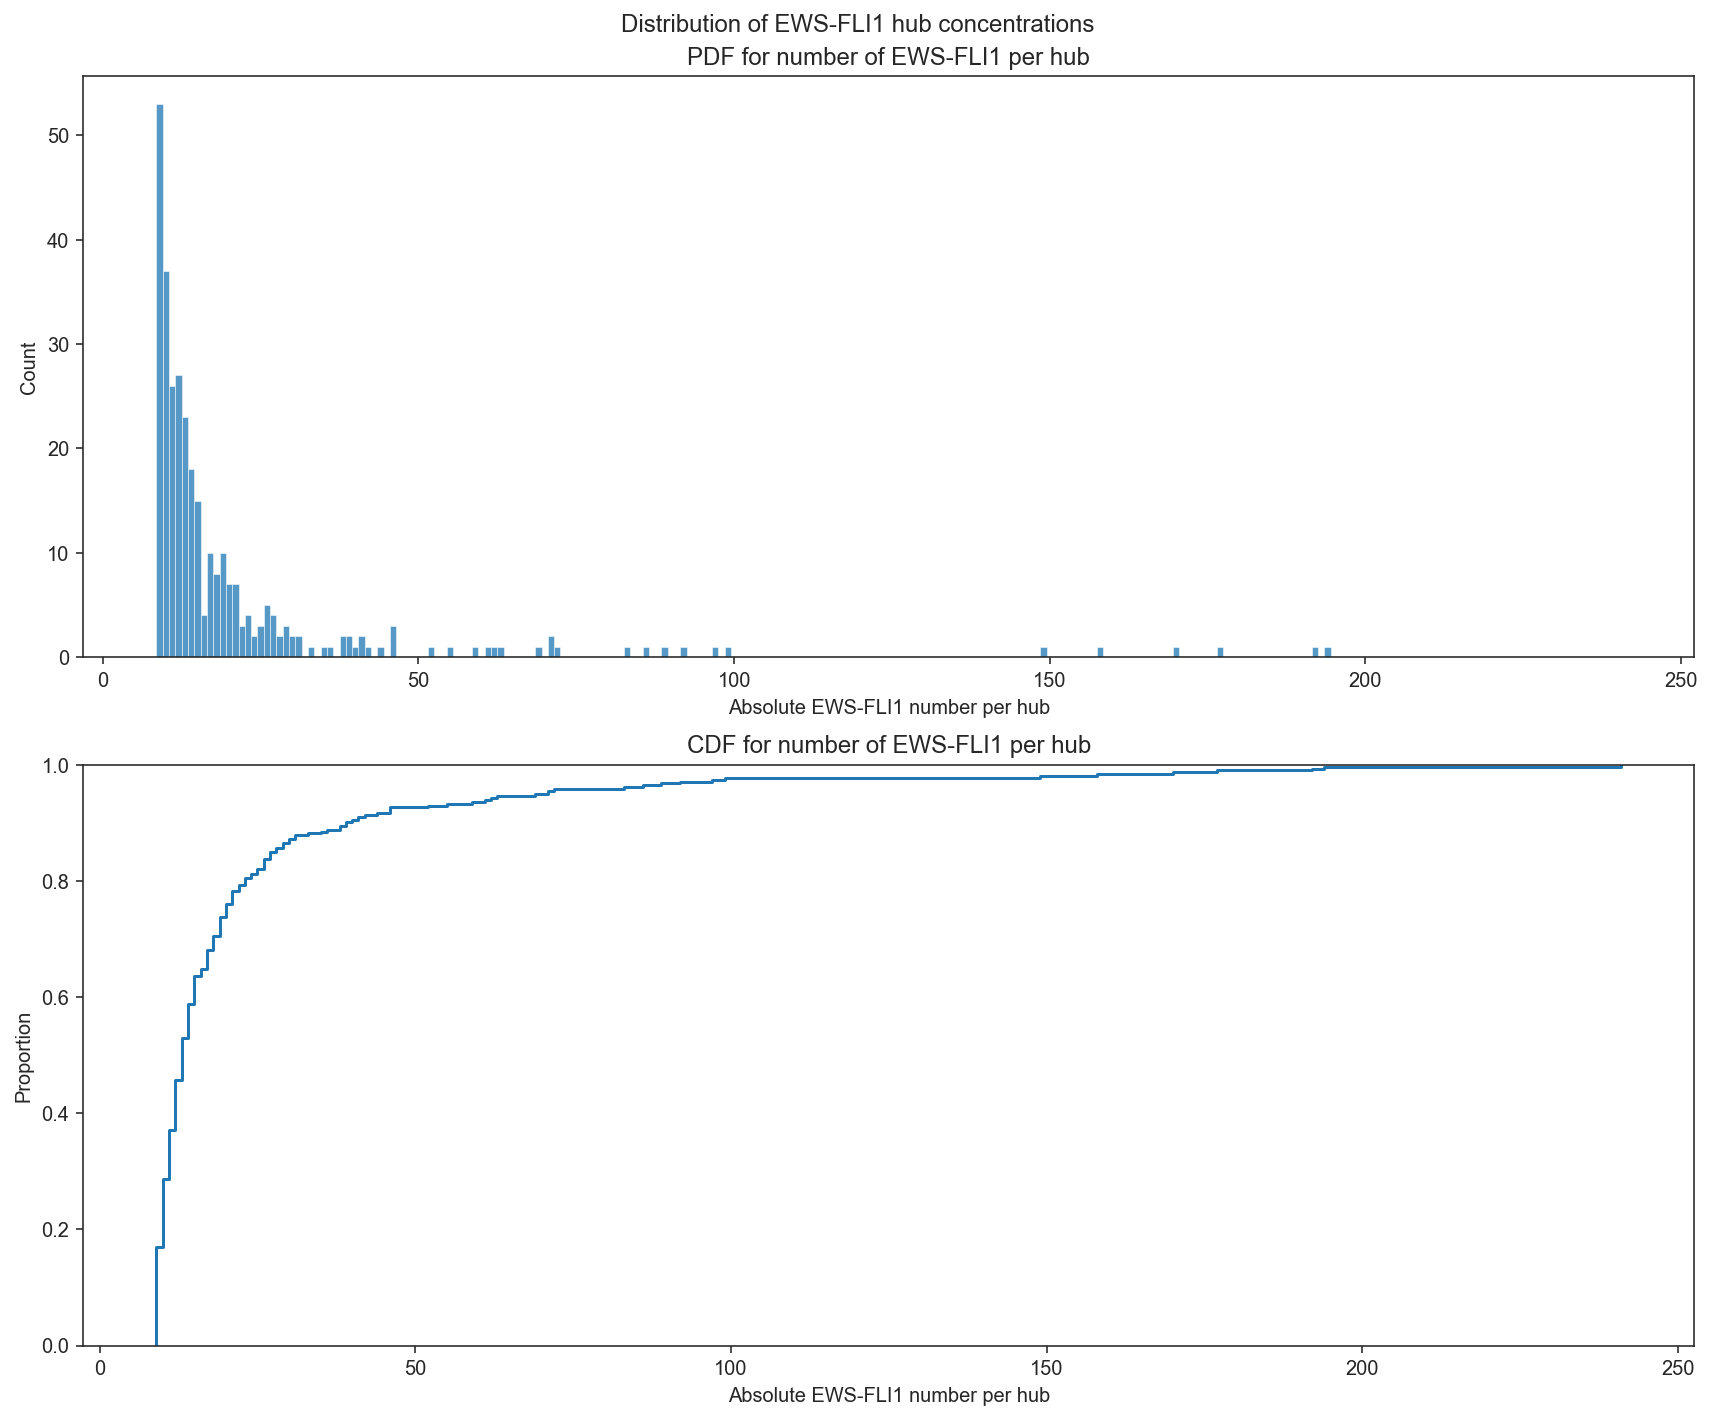

In [21]:
proteins_per_hub_over_eight = [elem for elem in proteins_per_hub if elem > 8]
    
bins_list = np.arange(np.min(proteins_per_hub_over_eight) - .5, \
                      np.max(proteins_per_hub_over_eight) + .5, 1)

# Generate figure and title
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Distribution of EWS-FLI1 hub concentrations')

# Plot data from each channel on it's respective axis
sns.histplot(ax = axes[0], data = proteins_per_hub_over_eight, bins = bins_list)
sns.ecdfplot(ax = axes[1], data = proteins_per_hub_over_eight)

# Labeling subplots
axes[0].set_title('PDF for number of EWS-FLI1 per hub')
axes[1].set_title('CDF for number of EWS-FLI1 per hub')
axes[0].set_xlabel('Absolute EWS-FLI1 number per hub')
axes[1].set_xlabel('Absolute EWS-FLI1 number per hub');

plt.tight_layout()

#### Zoom in on hubs w/ fewer than 50 proteins per hub

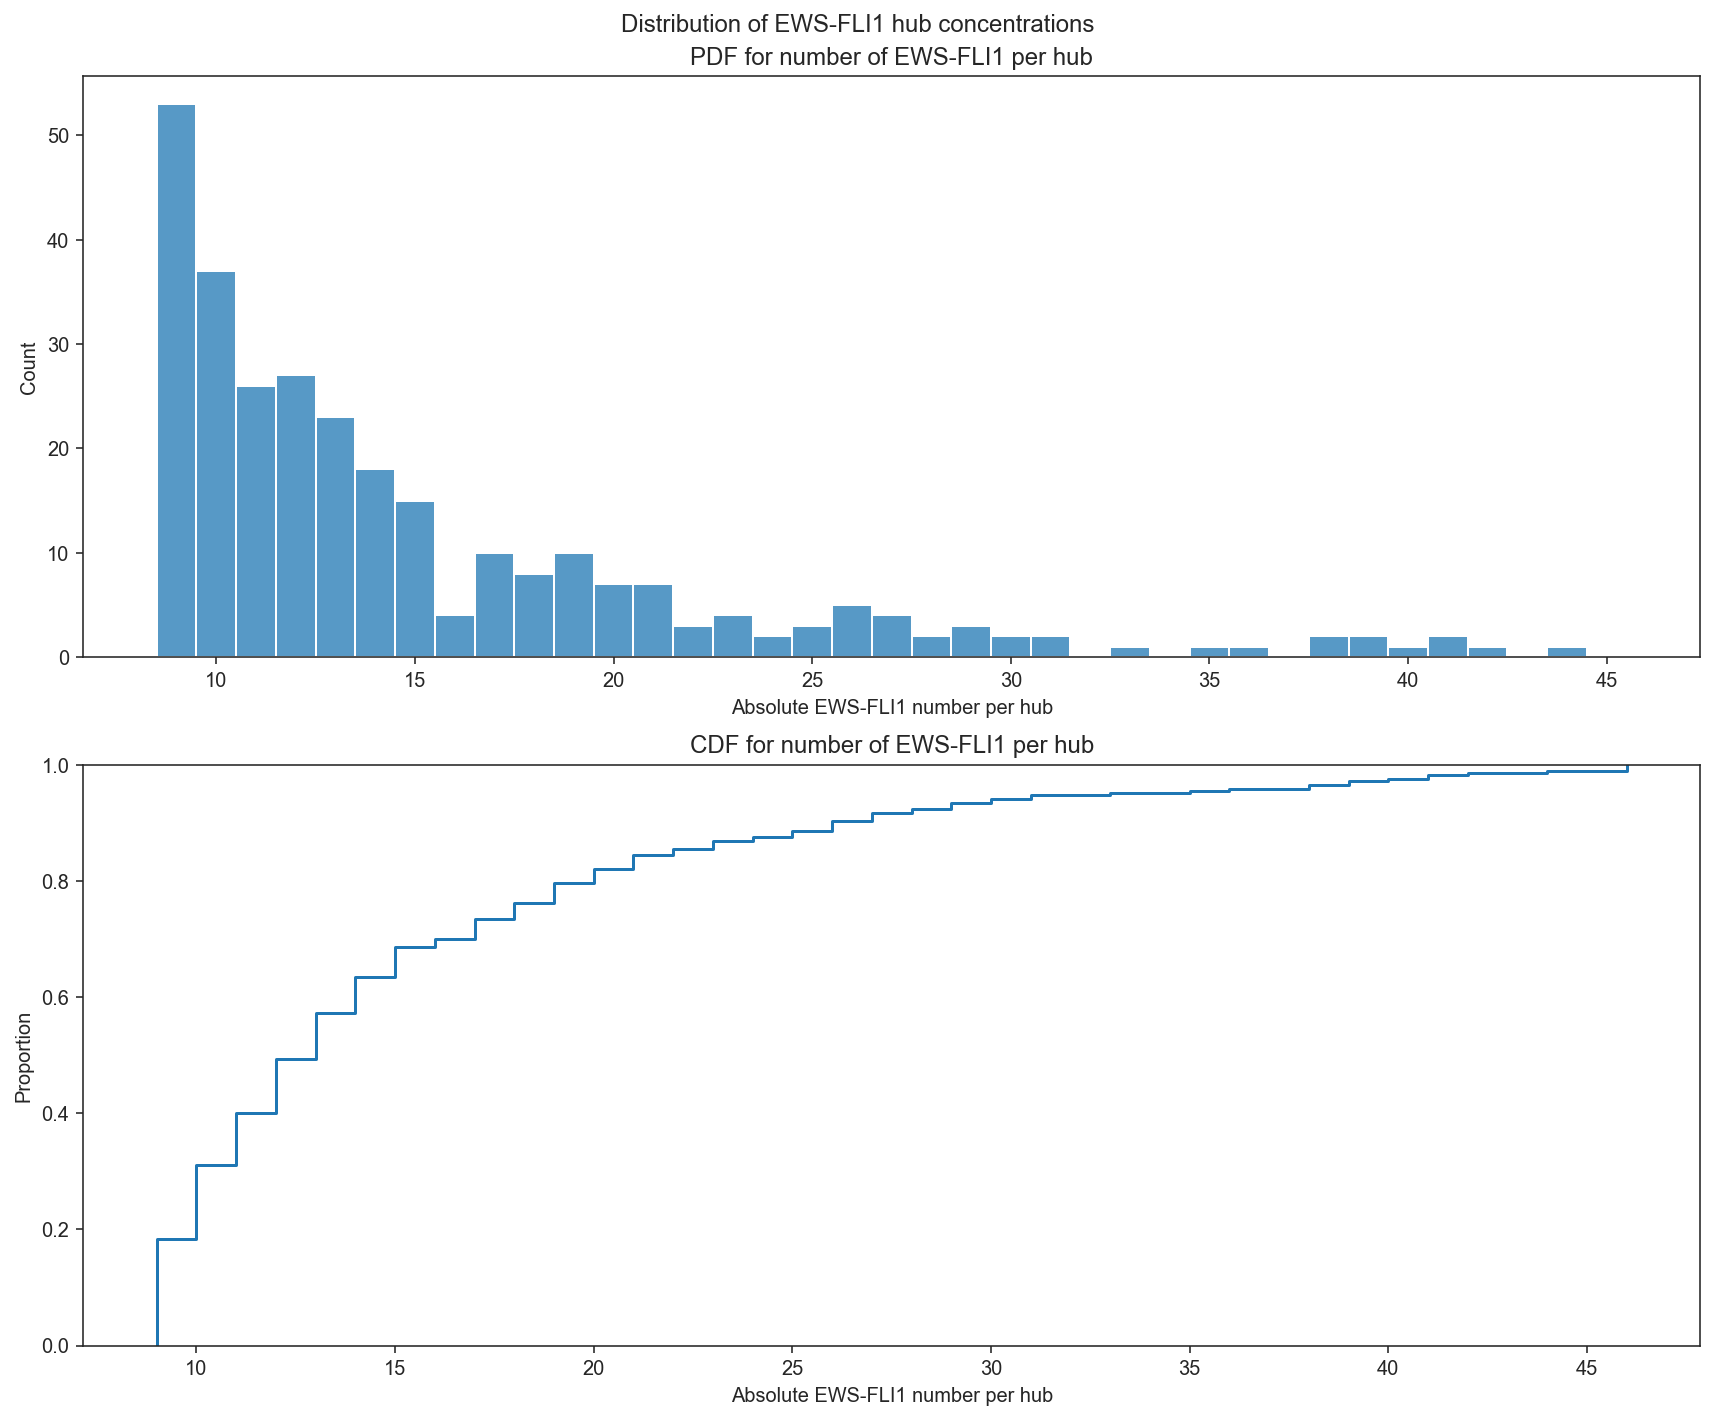

In [26]:
proteins_per_hub_under_fifty = [elem for elem in proteins_per_hub_over_eight if elem < 50]
    
bins_list = np.arange(np.min(proteins_per_hub_under_fifty) - .5, \
                      np.max(proteins_per_hub_under_fifty) + .5, 1)

# Generate figure and title
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Distribution of EWS-FLI1 hub concentrations')

# Plot data from each channel on it's respective axis
sns.histplot(ax = axes[0], data = proteins_per_hub_under_fifty, bins = bins_list)
sns.ecdfplot(ax = axes[1], data = proteins_per_hub_under_fifty)

# Labeling subplots
axes[0].set_title('PDF for number of EWS-FLI1 per hub')
axes[1].set_title('CDF for number of EWS-FLI1 per hub')
axes[0].set_xlabel('Absolute EWS-FLI1 number per hub')
axes[1].set_xlabel('Absolute EWS-FLI1 number per hub');

plt.tight_layout()

In [24]:
median = np.median(proteins_per_hub_over_eight)
median

13.0